# Data Analytics - Lab 1 - Random data visualisation and sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from scipy.stats import beta
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
mpl.style.use('default')

### Exercise 2

In [2]:
uniformDistributionSamp = np.random.uniform(size=1000)

normalDistributionSamp1 = np.random.normal(0, 1, 1000)
normalDistributionSamp2 = np.random.normal(0, 10, 1000)

betaDistributionSamp11 = np.random.beta(1, 1, 1000)
betaDistributionSamp22 = np.random.beta(2, 2, 1000)
betaDistributionSamp39 = np.random.beta(3, 9, 1000)

mean = np.array([0, 0])
covarianceMat1 = np.eye(2, dtype=int)
covarianceMat2 = np.array([[2, 1], [1, 2]])
twoDimNormalDistributionSamp1 = np.random.multivariate_normal(mean, covarianceMat1, 10000)
twoDimNormalDistributionSamp2 = np.random.multivariate_normal(mean, covarianceMat2, 10000)


### Exercise 3

In [3]:
def drawDistributionHist(distributionSamp, bins, title='', density=False, analyticalFormula=None):
    count, bins, ignored = plt.hist(distributionSamp, bins=bins, density=density)
    plt.title(title)
    plt.show()

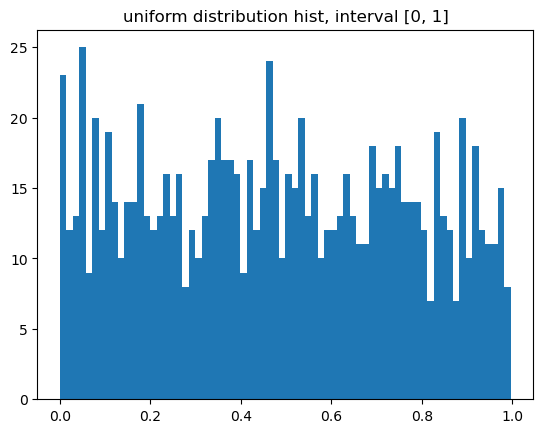

In [4]:
drawDistributionHist(uniformDistributionSamp, 70, 'uniform distribution hist, interval [0, 1]')

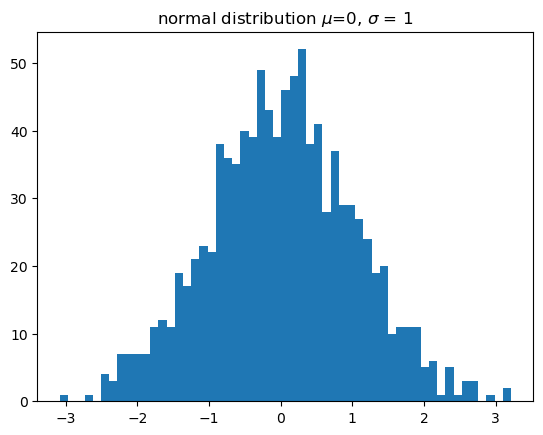

In [5]:
drawDistributionHist(normalDistributionSamp1, 55, 'normal distribution $\mu$=0, $\sigma$ = 1')

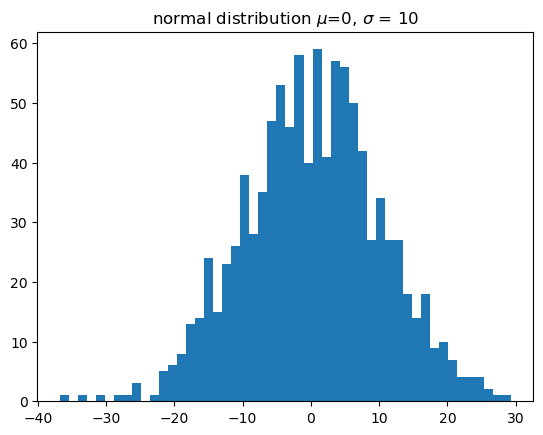

In [6]:
drawDistributionHist(normalDistributionSamp2, 50, 'normal distribution $\mu$=0, $\sigma$ = 10')

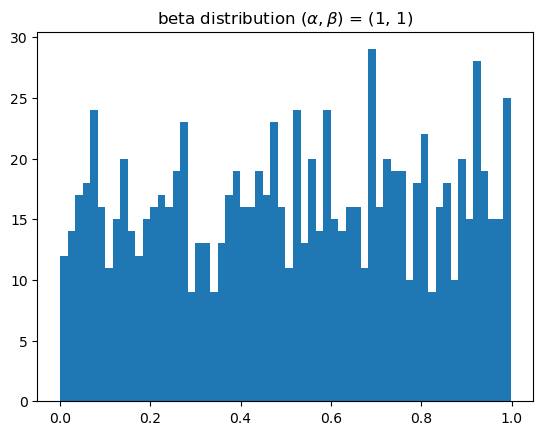

In [7]:
drawDistributionHist(betaDistributionSamp11, 60, r'beta distribution ($\alpha, \beta$) = (1, 1)')

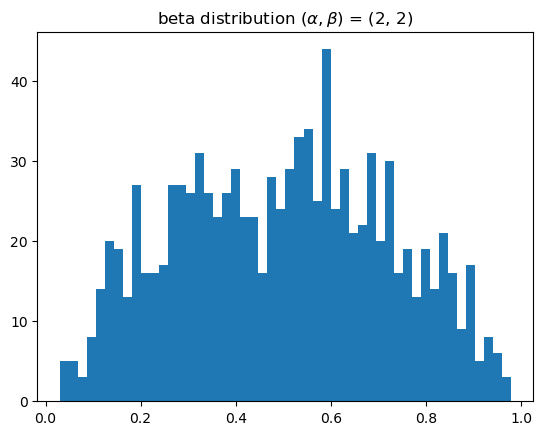

In [8]:
drawDistributionHist(betaDistributionSamp22, 50, r'beta distribution ($\alpha, \beta$) = (2, 2)')

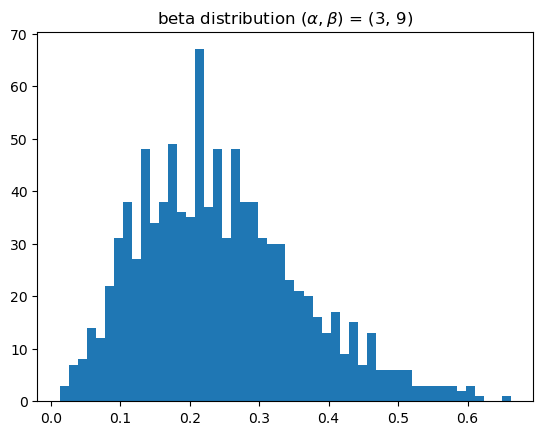

In [9]:
drawDistributionHist(betaDistributionSamp39, 50, r'beta distribution ($\alpha, \beta$) = (3, 9)')

### ----------------------------------------------------------------------------------

In [10]:
def drawUniformNormalizedHist(distributionSamp, bins):
    count, bins, ignored = plt.hist(distributionSamp, bins=bins, density=True, label='')
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r', label='analytical function')
    plt.title('uniform distribution hist, interval [0, 1]')
    plt.legend()
    plt.show()


def drawNormalDistNormalizedHist(distributionSamp, bins, mu, sigma):
    count, bins, ignored = plt.hist(distributionSamp, bins=bins, density=True, label='')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),\
             linewidth=2, color='r', label='analytical function')
    plt.title(f'normal distribution $\mu$={str(mu)}, $\sigma$={str(sigma)}')
    plt.legend()
    plt.show()

def drawBetaDistNormalizedHist(distributionSamp, bins, alpha_, beta_):
    count, bins, ignored = plt.hist(distributionSamp, bins=bins, density=True, label='')
    plt.plot(bins, beta.pdf(bins, alpha_, beta_), 'r-', lw=5, alpha=0.6, label='analytical function')
    plt.title(r'beta distribution ($\alpha, \beta$) = ' + str(alpha_) + ", " + str(beta_))
    plt.legend()
    plt.show()

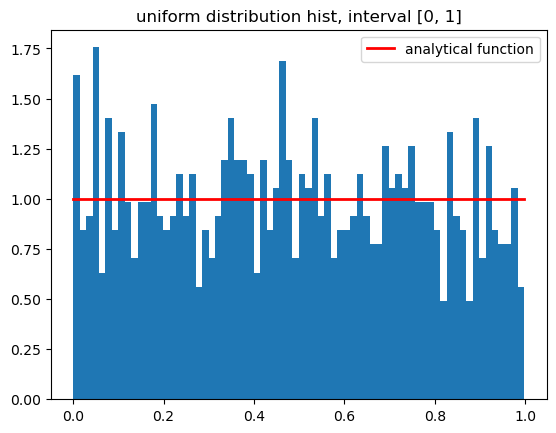

In [11]:
drawUniformNormalizedHist(uniformDistributionSamp, 70)

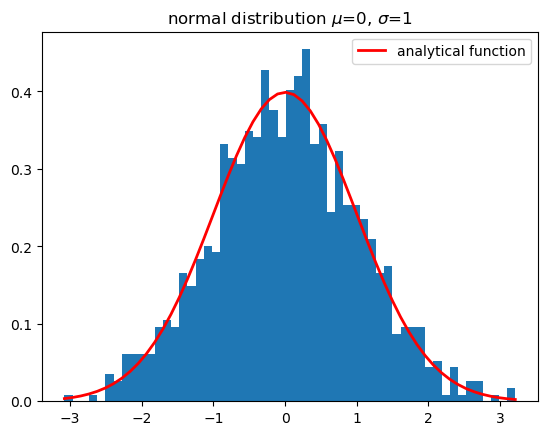

In [12]:
drawNormalDistNormalizedHist(normalDistributionSamp1, 55, mu=0, sigma=1)

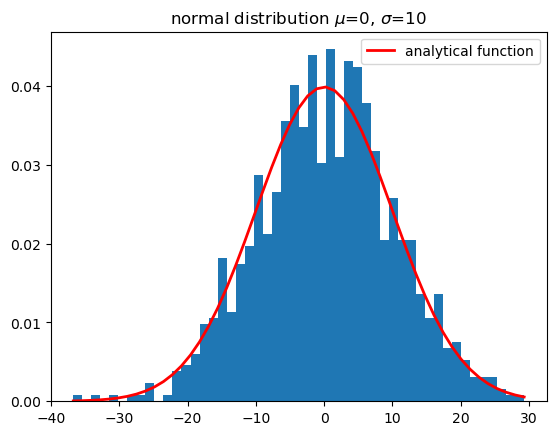

In [13]:
drawNormalDistNormalizedHist(normalDistributionSamp2, 50, mu=0, sigma=10)

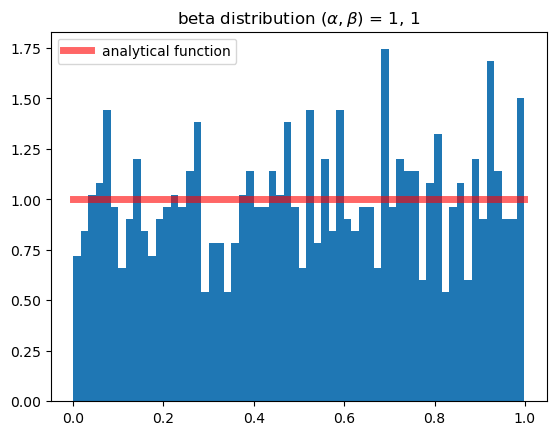

In [14]:
drawBetaDistNormalizedHist(betaDistributionSamp11, 60, 1, 1)

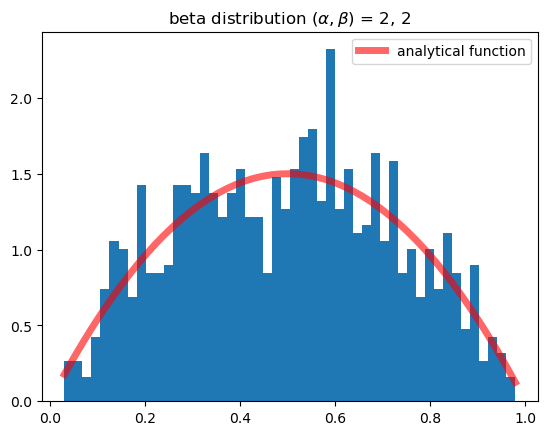

In [15]:
drawBetaDistNormalizedHist(betaDistributionSamp22, 50, 2, 2)

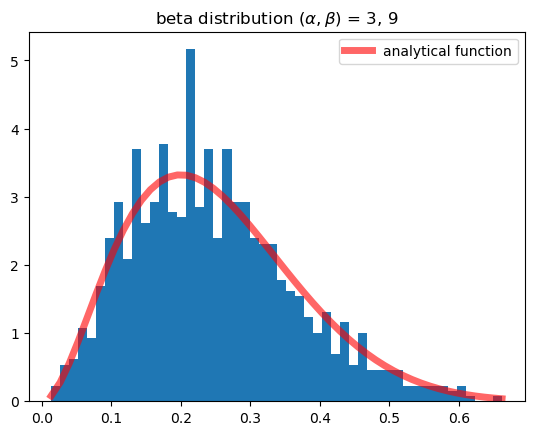

In [16]:
drawBetaDistNormalizedHist(betaDistributionSamp39, 50, 3, 9)

### Exercise 4

In [17]:
def plot2dDistributionHist(distributionSamp, bins, covarianceMat):
    array2dToString = lambda covarianceMat: "[" + str(covarianceMat[0, :]) + ", " + str(covarianceMat[1, :]) + "]"
    x, y = distributionSamp.T
    plt.figure()
    plt.hist2d(x, y, bins = bins, norm = colors.LogNorm())
    plt.title("2d normal distribution $\mu$=[0, 0].T,\n covariance = " + \
              array2dToString(covarianceMat))

def plotSeaborn2dDistributionHist(distributionSamp, bins, covarianceMat):
    array2dToString = lambda covarianceMat: "[" + str(covarianceMat[0, :]) + ", " + str(covarianceMat[1, :]) + "]"
    distributionDf = pd.DataFrame(distributionSamp, columns=['x_axis', 'y_axis'])
    sns.histplot(distributionDf, x="x_axis", y="y_axis", bins=bins)
    plt.title("2d normal distribution $\mu$=[0, 0].T,\n covariance = " + \
              array2dToString(covarianceMat))
    

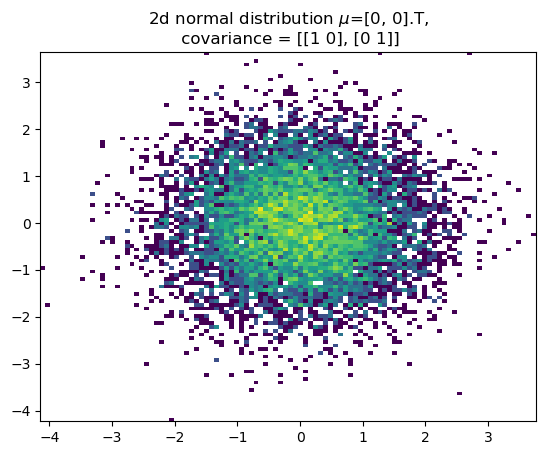

In [18]:
plot2dDistributionHist(twoDimNormalDistributionSamp1, 100, covarianceMat1)

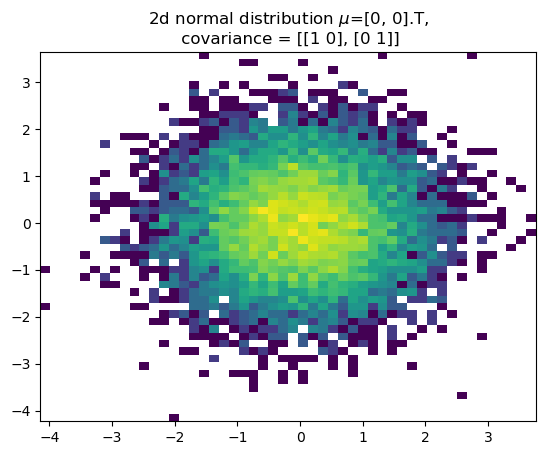

In [19]:
plot2dDistributionHist(twoDimNormalDistributionSamp1, 50, covarianceMat1)

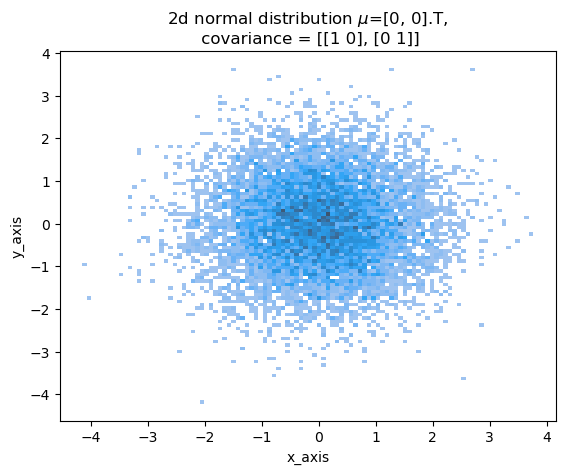

In [20]:
plotSeaborn2dDistributionHist(twoDimNormalDistributionSamp1, 100, covarianceMat1)

### ------------------------------------------------------------------------------

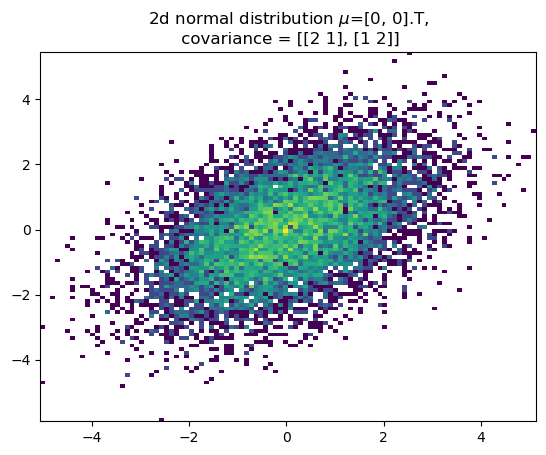

In [21]:
plot2dDistributionHist(twoDimNormalDistributionSamp2, 100, covarianceMat2)

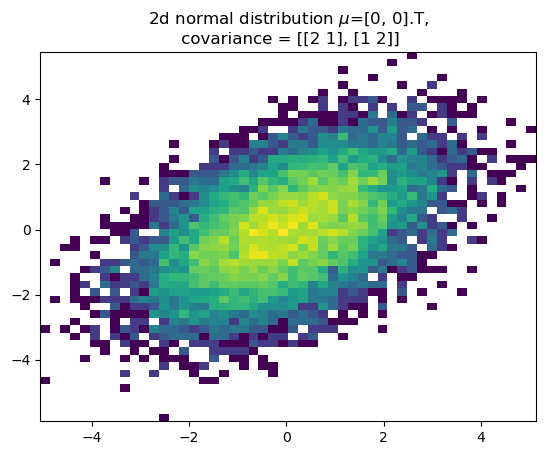

In [22]:
plot2dDistributionHist(twoDimNormalDistributionSamp2, 50, covarianceMat2)

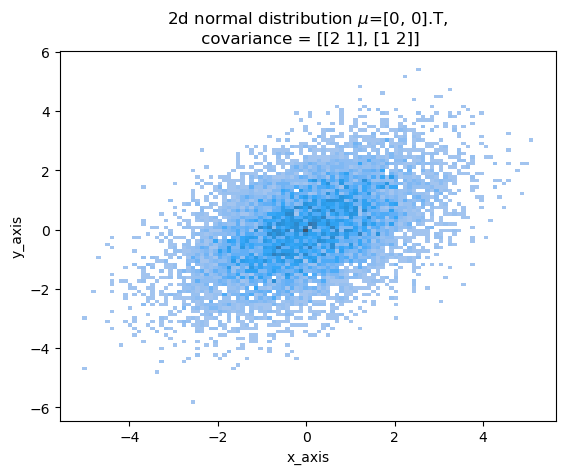

In [23]:
plotSeaborn2dDistributionHist(twoDimNormalDistributionSamp2, 100, covarianceMat2)

### Exercise 5

In [24]:
alpha_ = np.random.normal(2, 0.1, 1000)
beta_ = np.random.normal(0.2, 0.2, 1000)
x_ = np.random.normal(0, 3, 1000)
sigma_ = np.abs(np.random.normal(0, 1, 1000))

In [25]:
mu_ = alpha_ + (beta_ * x_)
y_ = np.random.normal(mu_, sigma_, 1000)

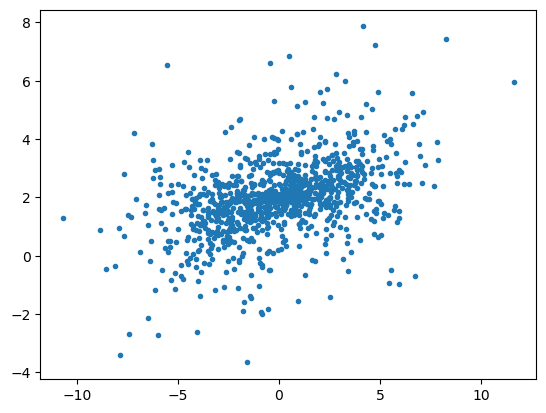

In [26]:
plt.figure()
plt.plot(x_, y_, '.')

In [27]:
y_6 = alpha_ + beta_ * x_

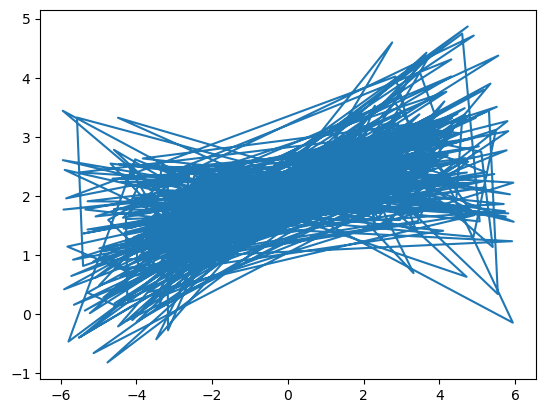

In [28]:
x6 = x_[np.where((x_ > -6) & (x_ < 6))]
y6 = y_6[np.where((x_ > -6) & (x_ < 6))]

plt.figure()
plt.plot(x6, y6)

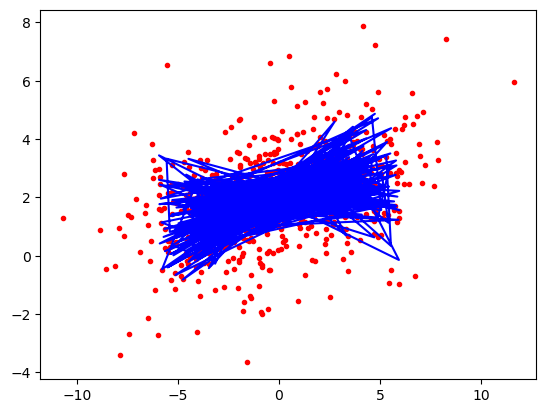

In [30]:
plt.figure()
plt.plot(x_, y_, 'r.')
plt.plot(x6, y6, 'b')